### Name: Crystal Lau
### Date: 06/18/2018
### Challenge: Feedback Analysis

Assignment: Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

from README:

Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

Meaning that I only need to create a model that id's pos sentences

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# importing raw data and renaming columns
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['reviews', 'pos_review']

In [3]:
# sample of data
df.head()

,reviews,pos_review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
# list of positive and negative keywords to look for in reviews
pos_keywords = ['great', 'good', 'excellent', 'love', 'nice', 'awesome', 'best', 'satisfied']
neg_keywords = ['bad', 'waste', 'disappointed', 'worst','poor', 'horrible' ]

In [27]:
# create a function to create classifier
def classifier(kw_list, df):
    for key in kw_list:
        df[str(key)] = df.reviews.str.contains(str(key), case=False)
    df['pos_review'] = (df['pos_review'] == 1)
    sns.heatmap(df.corr())
    data = df[kw_list]
    target = df['pos_review']
    bnb = BernoulliNB()
    bnb.fit(data, target)
    # classifying data
    y_pred = bnb.predict(data)
    # displaying results
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    confusion_matrix(target, y_pred)
    # printing list of incorrect predictions
    # print(df[target != y_pred])

#### Version 1 Classifier

Number of mislabeled points out of a total 1000 points : 397


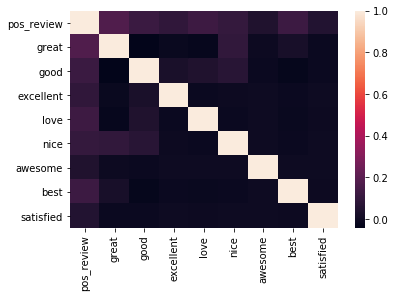

In [6]:
classifier(pos_keywords, df)

In [10]:
# looking at the mislabeled points to see how to improve classifier
df[target != y_pred]

,reviews,pos_review,great,good,excellent,love,nice,awesome,best,satisfied
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False
10,And the sound quality is great.,True,False,False,False,False,False,False,False,False
11,He was very impressed when going from the orig...,True,False,False,False,False,False,False,False,False
15,Highly recommend for any one who has a blue to...,True,False,False,False,False,False,False,False,False
17,So Far So Good!.,True,False,False,False,False,False,False,False,False
18,Works great!.,True,False,False,False,False,False,False,False,False
21,I bought this to use with my Kindle Fire and a...,True,False,False,False,False,False,False,False,False
23,I have yet to run this new battery below two b...,True,False,False,False,False,False,False,False,False


It looks like my classifier has difficulty with identifying positive reviews.

#### Version 2 Classifier

In [6]:
# changing the cases of the reviews to all lowercase
df['reviews'] = df['reviews'].str.lower()

Number of mislabeled points out of a total 1000 points : 289
                                               reviews  pos_review  great  \
7          if you are razr owner...you must have this!        True  False   
11   he was very impressed when going from the orig...        True  False   
15   highly recommend for any one who has a blue to...        True  False   
23   i have yet to run this new battery below two b...        True  False   
31   this product is ideal for people like me whose...        True  False   
34   car charger as well as ac charger are included...        True  False   
36                           it has kept up very well.        True  False   
45                      it has all the features i want        True  False   
48                          this case seems well made.        True  False   
52   a usable keyboard actually turns a pda into a ...        True  False   
53   this phone is pretty sturdy and i've never had...        True  False   
55   everything

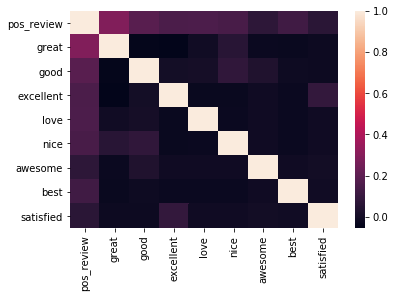

In [7]:
classifier(pos_keywords, df)

#### Version 3 Classifier

In [9]:
# changing the positive keywords to stems
pos_keywords1 = ['great', 'good', 'excellent', 'lov', 'nice', 'awesome', 'best', 'satisf']

In [10]:
# resetting the df to start fresh
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['reviews', 'pos_review']

Number of mislabeled points out of a total 1000 points : 290
                                               reviews  pos_review  great  \
7          If you are Razr owner...you must have this!        True  False   
11   He was very impressed when going from the orig...        True  False   
15   Highly recommend for any one who has a blue to...        True  False   
23   I have yet to run this new battery below two b...        True  False   
31   This product is ideal for people like me whose...        True  False   
34   Car charger as well as AC charger are included...        True  False   
36                           It has kept up very well.        True  False   
45                      It has all the features I want        True  False   
48                          This case seems well made.        True  False   
52   A usable keyboard actually turns a PDA into a ...        True  False   
53   This phone is pretty sturdy and I've never had...        True  False   
55   Everything

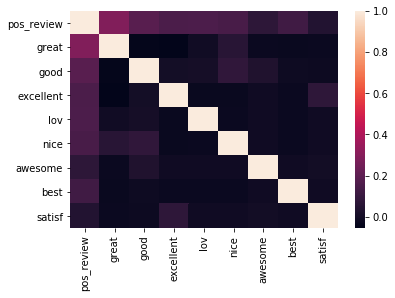

In [11]:
classifier(pos_keywords1, df)

Seems like the classifier did worse when we don't change the case.

#### Version 4 Classifier

In [12]:
# including negative keywords in addition to positive keywords for model to learn
keywords = ['great', 'good', 'excellent', 'love', 'nice', 'awesome', 'best', 'satisfied', 'worst', 'bad', 'not', ' no ',
           'waste', 'disappointed','poor', 'horrible','!']

In [13]:
# resetting the df to start fresh
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['reviews', 'pos_review']

Number of mislabeled points out of a total 1000 points : 284
                                               reviews  pos_review  great  \
3    Tied to charger for conversations lasting more...       False  False   
11   He was very impressed when going from the orig...        True  False   
15   Highly recommend for any one who has a blue to...        True  False   
23   I have yet to run this new battery below two b...        True  False   
31   This product is ideal for people like me whose...        True  False   
34   Car charger as well as AC charger are included...        True  False   
36                           It has kept up very well.        True  False   
45                      It has all the features I want        True  False   
48                          This case seems well made.        True  False   
51   good protection and does not make phone too bu...        True  False   
52   A usable keyboard actually turns a PDA into a ...        True  False   
53   This phone

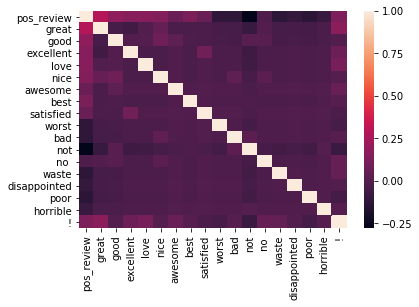

In [14]:
classifier(keywords, df)

#### Version 5 Classifier 

In [ ]:
# resetting the df to start fresh
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['reviews', 'pos_review']

In [15]:
#including all the changes that improved the iteration
keywords = ['great', 'good', 'excellent', 'lov', 'nice', 'awesome', 'best', 'satisf', 'worst', 'bad', 'not', ' no ',
           'waste', 'disappoint','poor', 'horribl','!']
df['reviews'] = df['reviews'].str.lower()

Number of mislabeled points out of a total 1000 points : 282
                                               reviews  pos_review  great  \
3    tied to charger for conversations lasting more...       False  False   
11   he was very impressed when going from the orig...        True  False   
15   highly recommend for any one who has a blue to...        True  False   
23   i have yet to run this new battery below two b...        True  False   
31   this product is ideal for people like me whose...        True  False   
34   car charger as well as ac charger are included...        True  False   
36                           it has kept up very well.        True  False   
45                      it has all the features i want        True  False   
48                          this case seems well made.        True  False   
51   good protection and does not make phone too bu...        True  False   
52   a usable keyboard actually turns a pda into a ...        True  False   
53   this phone

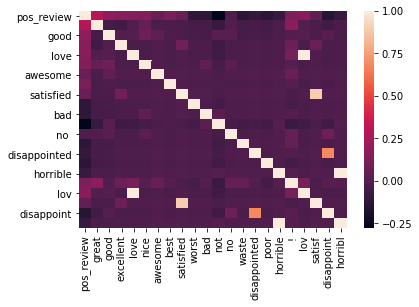

In [16]:
classifier(keywords, df)

## Classifier Evaluation

In [31]:
# Final Classifier's Guts
data = df[keywords]
target = df['pos_review']
bnb = BernoulliNB()
bnb.fit(data, target)
# classifying data
y_pred = bnb.predict(data)
# Confusion Matrix
confusion_matrix(target, y_pred)

array([[465,  35],
       [247, 253]])

False Positives: 35

False Negatives: 247

 Looks like we need a better way to id the negative reviews.

In [33]:
# Using Holdout Groups to test for overfitting
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.705
Testing on Sample: 0.718


Doesn't look too bad!